In [66]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [74]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import pandas as pd
import numpy as np
import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import tensorflow as tf

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

# Untuk save model
import joblib
import tensorflowjs as tfjs

In [20]:
from google.colab import drive
drive.mount("/content/gdrive")
place = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Dataset.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
data=place.copy()

In [22]:
data

,Place_ID,Name,Image,URL,Rating,Num_Rating,Category,Address,Longitude,Latitude,Label_Kecamatan
0,11,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.com/maps/place/Mr.K+Cafe+Go...,4.5,6235,Restoran,Jl. Setia Budi No.28,110.418685,-7.038795,1
1,12,Super Penyet Setiabudi,https://lh5.googleusercontent.com/p/AF1QipMufn...,https://www.google.com/maps/place/Super+Penyet...,4.4,5702,Ayam,Jl. Setia Budi No.207,110.411722,-7.058634,1
2,13,Sim Six (Sim-6) garden Resto Ngesrep timur,https://lh5.googleusercontent.com/p/AF1QipPfQx...,https://www.google.com/maps/place/Sim+Six+%28S...,4.5,4265,Restoran,Jl. Ngesrep Tim. V No.25,110.417238,-7.064682,1
3,14,Sowak (Sop Iwak),https://lh5.googleusercontent.com/p/AF1QipPKYy...,https://www.google.com/maps/place/Sowak+%28Sop...,4.4,4251,Rumah Makan,Jl. Banjarsari Selatan No.18,110.432990,-7.061215,1
4,15,Warung Lesehan Fifty Fifty Sumurboto Banyumanik,https://lh5.googleusercontent.com/p/AF1QipNxvJ...,https://www.google.com/maps/place/Warung+Leseh...,4.3,3822,Jawa,Jl. Ngesrep Tim. V No.118,110.426369,-7.053008,1
...,...,...,...,...,...,...,...,...,...,...,...
277,2153,Djoewalan Frozen Mart,https://lh5.googleusercontent.com/p/AF1QipPkas...,https://www.google.com/maps/place/Djoewalan+Fr...,4.7,148,Toko makanan beku,"No.9 Ruko Blok G, Jl. Elang Raya",110.456781,-7.033668,15
278,2154,bandeng presto dan tahu bakso new citra semarang,https://lh5.googleusercontent.com/p/AF1QipNQiv...,https://www.google.com/maps/place/bandeng+pres...,4.4,68,Pusat Perbelanjaan,"rt 4 rw 5, Jl. Rogojembangan Tim.",110.448935,-7.014627,15
279,2155,Oleh Oleh Khas Semarang Kue Tanduk Murni,https://lh5.googleusercontent.com/p/AF1QipNcN5...,https://www.google.com/maps/place/Oleh+Oleh+Kh...,4.6,51,Pastri,Jl. Sinar Kencana V No.906,110.472043,-7.024733,15
280,2161,Pusat Oleh Oleh Khas Semarang,NaN,https://www.google.com/maps/place/Pusat+Oleh+O...,4.3,161,Toko Swalayan,Jl. Walisongo No.8,110.378613,-7.064680,16


In [23]:
coordinate = data[['Longitude','Latitude']]

In [80]:
# SSE values for different K
sse_values = []
K = range(1, 25)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(coordinate)
    sse_values.append(kmeans.inertia_)

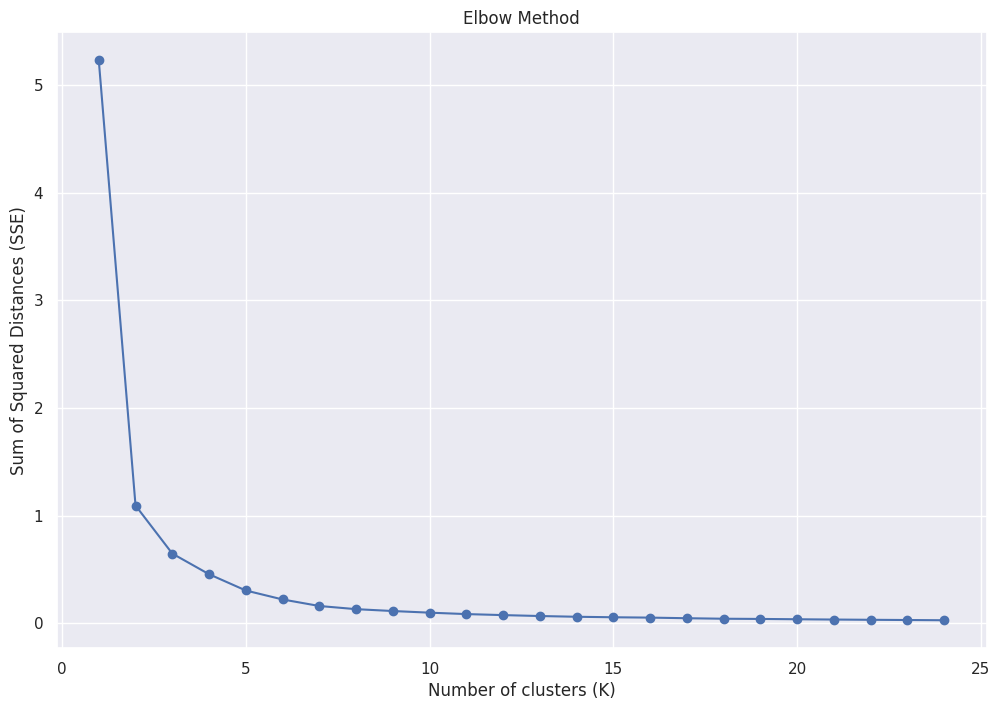

In [81]:
# Plot SSE values against K
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(K, sse_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method')
plt.show()

In [82]:
from sklearn.metrics import silhouette_score

# Silhouette scores for different K
silhouette_scores = []
K = range(2, 25)
for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(coordinate)
    score = silhouette_score(coordinate, labels)
    silhouette_scores.append(score)

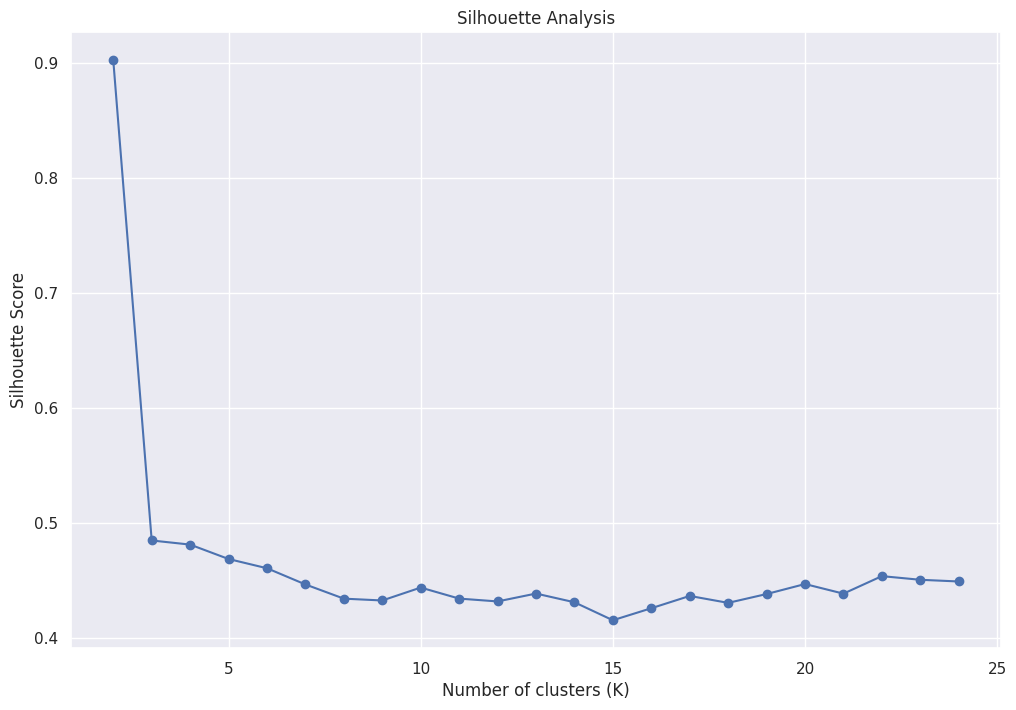

In [83]:
# Plot silhouette scores against K
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [84]:
# Number of optimal clusters
num_clusters = 16

# Create a K-means clustering model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(coordinate)

# Get the cluster labels for each coordinate
cluster_labels = kmeans.labels_

In [85]:
data['cluster_labels'] = kmeans.predict(coordinate)
data

,Place_ID,Name,Image,URL,Rating,Num_Rating,Category,Address,Longitude,Latitude,Label_Kecamatan,predicted_labels,cluster_labels
0,11,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.com/maps/place/Mr.K+Cafe+Go...,4.5,6235,Restoran,Jl. Setia Budi No.28,110.418685,-7.038795,1,6,4
1,12,Super Penyet Setiabudi,https://lh5.googleusercontent.com/p/AF1QipMufn...,https://www.google.com/maps/place/Super+Penyet...,4.4,5702,Ayam,Jl. Setia Budi No.207,110.411722,-7.058634,1,10,4
2,13,Sim Six (Sim-6) garden Resto Ngesrep timur,https://lh5.googleusercontent.com/p/AF1QipPfQx...,https://www.google.com/maps/place/Sim+Six+%28S...,4.5,4265,Restoran,Jl. Ngesrep Tim. V No.25,110.417238,-7.064682,1,10,4
3,14,Sowak (Sop Iwak),https://lh5.googleusercontent.com/p/AF1QipPKYy...,https://www.google.com/maps/place/Sowak+%28Sop...,4.4,4251,Rumah Makan,Jl. Banjarsari Selatan No.18,110.432990,-7.061215,1,10,4
4,15,Warung Lesehan Fifty Fifty Sumurboto Banyumanik,https://lh5.googleusercontent.com/p/AF1QipNxvJ...,https://www.google.com/maps/place/Warung+Leseh...,4.3,3822,Jawa,Jl. Ngesrep Tim. V No.118,110.426369,-7.053008,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2153,Djoewalan Frozen Mart,https://lh5.googleusercontent.com/p/AF1QipPkas...,https://www.google.com/maps/place/Djoewalan+Fr...,4.7,148,Toko makanan beku,"No.9 Ruko Blok G, Jl. Elang Raya",110.456781,-7.033668,15,8,8
278,2154,bandeng presto dan tahu bakso new citra semarang,https://lh5.googleusercontent.com/p/AF1QipNQiv...,https://www.google.com/maps/place/bandeng+pres...,4.4,68,Pusat Perbelanjaan,"rt 4 rw 5, Jl. Rogojembangan Tim.",110.448935,-7.014627,15,8,8
279,2155,Oleh Oleh Khas Semarang Kue Tanduk Murni,https://lh5.googleusercontent.com/p/AF1QipNcN5...,https://www.google.com/maps/place/Oleh+Oleh+Kh...,4.6,51,Pastri,Jl. Sinar Kencana V No.906,110.472043,-7.024733,15,8,8
280,2161,Pusat Oleh Oleh Khas Semarang,NaN,https://www.google.com/maps/place/Pusat+Oleh+O...,4.3,161,Toko Swalayan,Jl. Walisongo No.8,110.378613,-7.064680,16,2,9


In [86]:
# Function to recommend locations based on user's location
def recommend_locations(user_longitude, user_latitude, n=5):
    # Assign the user's location to the nearest cluster
    user_location = pd.DataFrame({'Longitude': [user_longitude], 'Latitude': [user_latitude]})
    user_cluster_label = kmeans.predict(user_location)

    # Filter locations in the same cluster as the user's location
    cluster_locations = data[data['cluster_labels'] == user_cluster_label[0]]

    # Calculate the distance between each location and the user's location
    cluster_locations['distance'] = ((cluster_locations['Longitude'] - user_longitude) ** 2 +
                                     (cluster_locations['Latitude'] - user_latitude) ** 2) ** 0.5

    # Sort locations by distance and select the top n recommendations
    recommendations = cluster_locations.sort_values('distance').head(n)

    # Create a list per row to store location information

    # Create separate lists for name, rating, and address
    names = recommendations['Name'].tolist()
    ratings = recommendations['Rating'].tolist()
    addresses = recommendations['Address'].tolist()
    num_ratings = recommendations['Num_Rating'].tolist()
    categories = recommendations['Category'].tolist()
    images = recommendations['Image'].tolist()
    urls = recommendations['URL'].tolist()
    
    return names, ratings, addresses, num_ratings, categories, images, urls   

In [87]:
# Example usage
user_longitude = 110.418685
user_latitude = -7.038795
recommended_names, recommended_ratings, recommended_addresses, recommended_num_ratings, \
    recommended_categories, recommended_images, recommended_urls = recommend_locations(user_longitude, user_latitude)

for i in range(len(recommended_names)):
    print("Name:", recommended_names[i])
    print("Rating:", recommended_ratings[i])
    print("Num_Rating:", recommended_num_ratings[i])
    print("Category:", recommended_categories[i])
    print("Address:", recommended_addresses[i])
    print("Image:", recommended_images[i])
    print("URL:", recommended_urls[i])
    print()

Name: Mr.K Cafe Gombel
Rating: 4.5
Num_Rating: 6235
Category: Restoran
Address: Jl. Setia Budi No.28
Image: https://lh5.googleusercontent.com/p/AF1QipOh43IEWoiCDqRZjhYO888zqLbFNXcueoV2lFWr=w163-h92-k-no
URL: https://www.google.com/maps/place/Mr.K+Cafe+Gombel/data=!4m7!3m6!1s0x2e708bf461121ec5:0x867e4fd7b13a5960!8m2!3d-7.0387953!4d110.4212602!16s%2Fg%2F11c6_w_jx4!19sChIJxR4SYfSLcC4RYFk6sddPfoY?authuser=0&hl=id&rclk=1

Name: Batik Kultur - Semarang Gallery by Dea Valencia
Rating: 4.6
Num_Rating: 225
Category: Toko Pakaian
Address: Jl. Gombel Lama No.32
Image: https://lh5.googleusercontent.com/p/AF1QipNEAGazLhYMbwtRNO7k20FOi7hO5Fas85tJLog=w122-h92-k-no
URL: https://www.google.com/maps/place/Batik+Kultur+-+Semarang+Gallery+by+Dea+Valencia/data=!4m7!3m6!1s0x2e708bf2d61c87fd:0xaaf122115b9fb630!8m2!3d-7.0368913!4d110.4173087!16s%2Fg%2F11bvv_74c8!19sChIJ_Ycc1vKLcC4RMLafWxEi8ao?authuser=0&hl=id&rclk=1

Name: The Hills Dining Restaurant
Rating: 4.4
Num_Rating: 1827
Category: Restoran
Address: Ro

In [88]:
# Save the K-means model to a file
joblib.dump(kmeans, 'model.h5')

['model.h5']

In [118]:
# Save the K-means model using joblib
joblib.dump(kmeans, 'model.pkl')

['model.pkl']

In [123]:
# Save the K-means model using joblib
joblib.dump(kmeans, 'model.joblib')

['model.joblib']